In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import numpy as np
from networkx.algorithms import cuts
import pandas as pd

In [7]:
file_path = 'graph_edges.xlsx'
data = pd.read_excel(file_path)

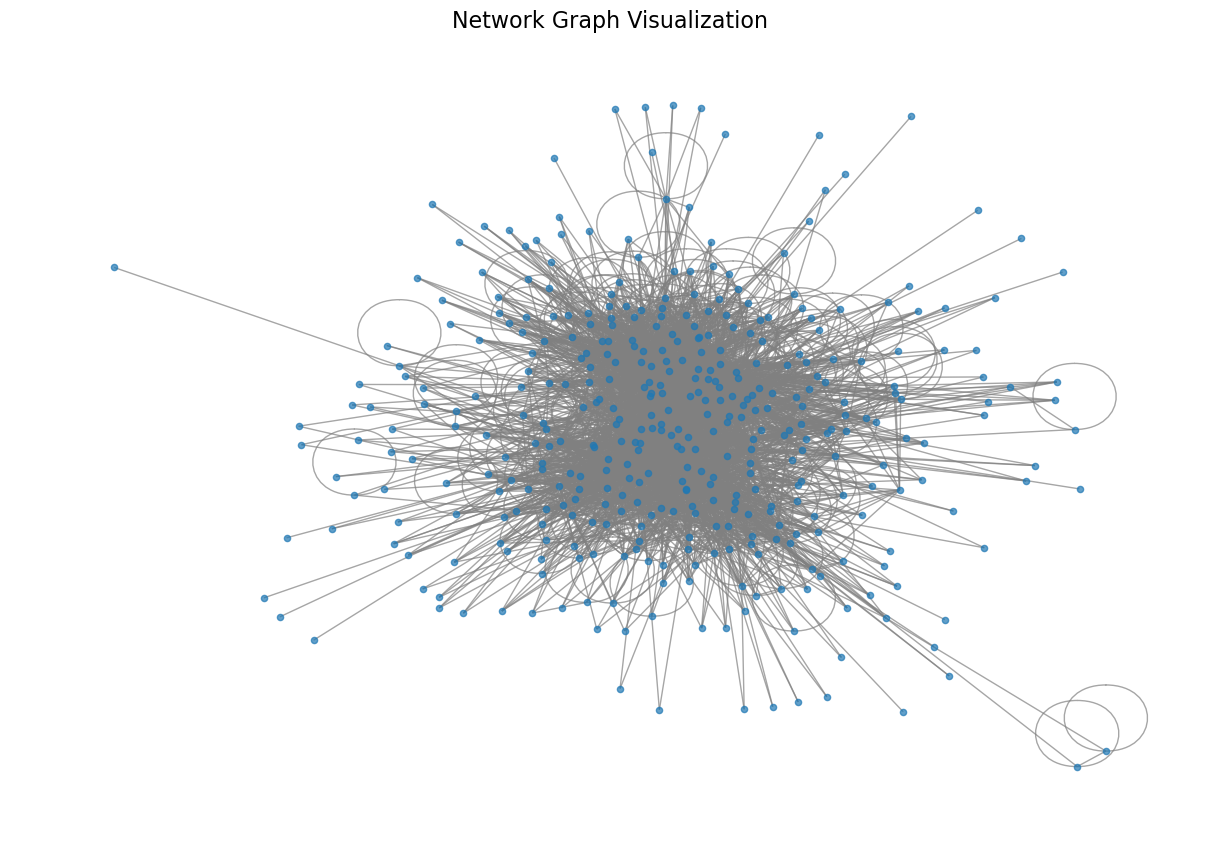

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the dataset
graph = nx.from_pandas_edgelist(data, source='Source', target='Target')

# Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph, seed=42)  # Use spring layout for better visualization
nx.draw(graph, pos, with_labels=False, node_size=20, edge_color="gray", alpha=0.7)
plt.title("Network Graph Visualization", fontsize=16)
plt.show()


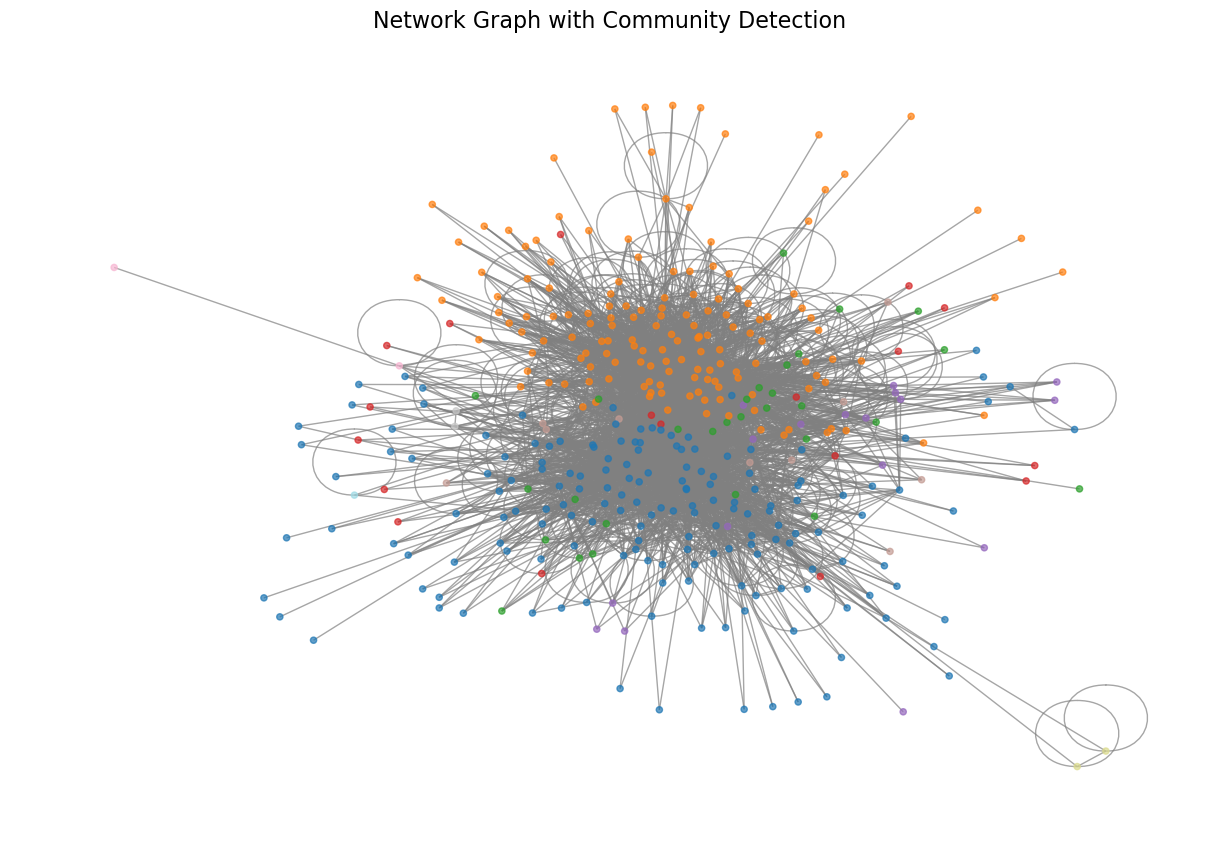

(10, 166, 1)

In [9]:
from networkx.algorithms.community import greedy_modularity_communities

# Perform community detection using the greedy modularity method
communities = list(greedy_modularity_communities(graph))

# Assign a unique color to each community
color_map = {}
for idx, community in enumerate(communities):
    for node in community:
        color_map[node] = idx

# Extract node colors based on community assignment
node_colors = [color_map[node] for node in graph.nodes()]

# Plot the graph with community coloring
plt.figure(figsize=(12, 8))
nx.draw(graph, pos, with_labels=False, node_color=node_colors, 
        node_size=20, cmap=plt.cm.tab20, edge_color="gray", alpha=0.7)
plt.title("Network Graph with Community Detection", fontsize=16)
plt.show()

# Summary of community detection results
num_communities = len(communities)
largest_community_size = max(len(c) for c in communities)
smallest_community_size = min(len(c) for c in communities)

num_communities, largest_community_size, smallest_community_size


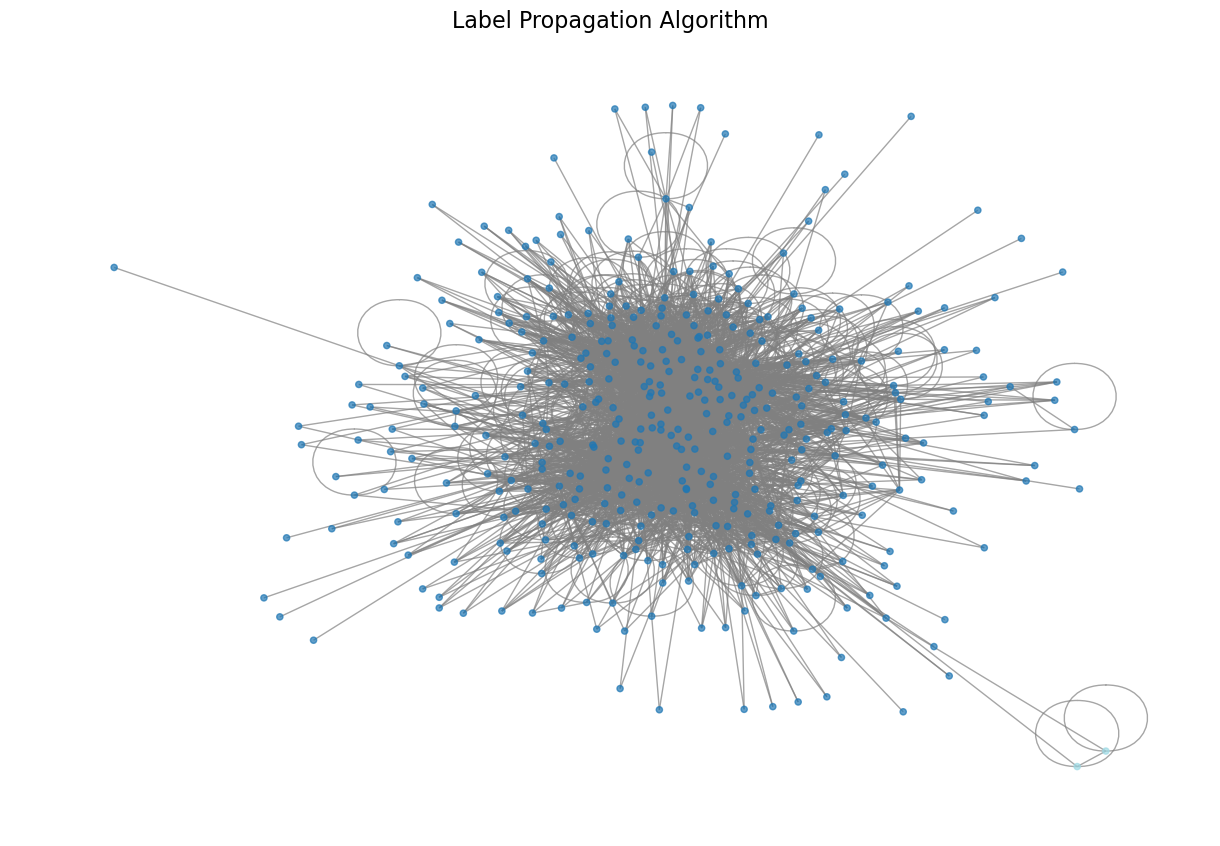

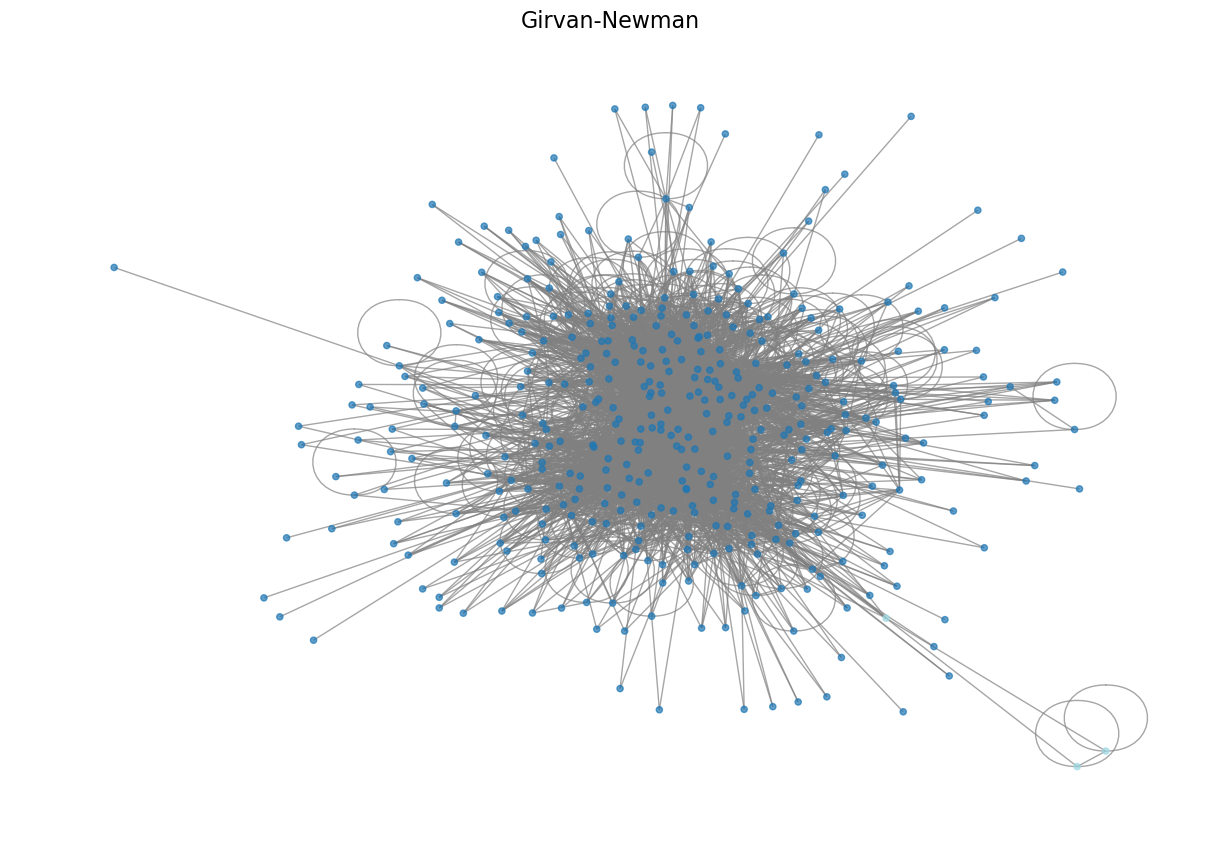

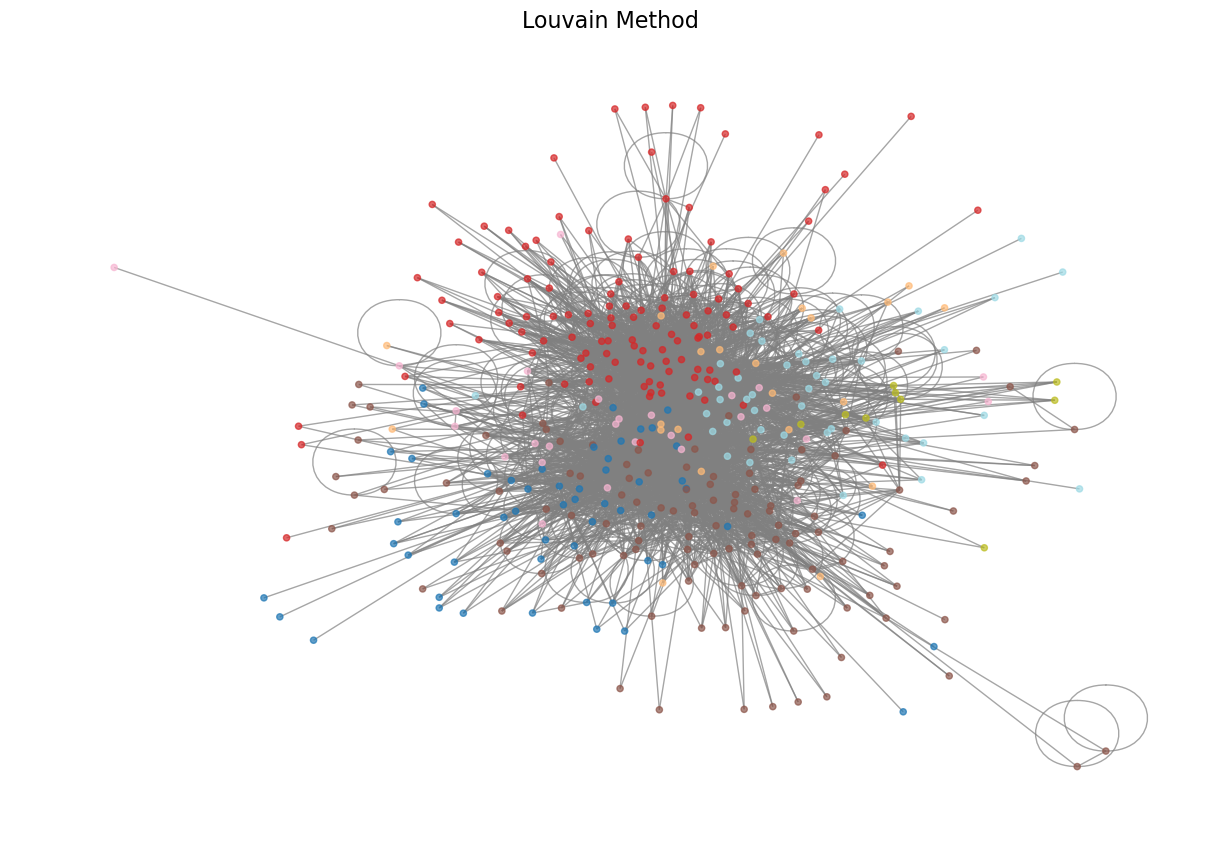

                             Method Number of Communities  \
0  [Asynchronous Label Propagation]                   [2]   
1                   [Girvan-Newman]                   [2]   
2                         [Louvain]                   [7]   

  Largest Community Size Smallest Community Size  
0                  [396]                     [2]  
1                  [395]                     [3]  
2                  [121]                    [10]  


In [11]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Tạo đồ thị từ dữ liệu
graph = nx.from_pandas_edgelist(data, source='Source', target='Target')

# Hàm hiển thị đồ thị với cụm
def plot_communities(graph, communities, title):
    # Gán màu cho các node dựa trên cụm
    color_map = {}
    for idx, community in enumerate(communities):
        for node in community:
            color_map[node] = idx
    node_colors = [color_map[node] for node in graph.nodes()]

    # Vẽ đồ thị
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(graph, seed=42)  # Sắp xếp node
    nx.draw(graph, pos, with_labels=False, node_color=node_colors,
            node_size=20, cmap=plt.cm.tab20, edge_color="gray", alpha=0.7)
    plt.title(title, fontsize=16)
    plt.show()

# 1. Asynchronous Label Propagation
asyn_label_communities = list(community.label_propagation_communities(graph))
plot_communities(graph, asyn_label_communities, "Label Propagation Algorithm")
asyn_summary = {
    "Method": ["Asynchronous Label Propagation"],
    "Number of Communities": [len(asyn_label_communities)],
    "Largest Community Size": [max(len(c) for c in asyn_label_communities)],
    "Smallest Community Size": [min(len(c) for c in asyn_label_communities)],
}

# 2. Girvan-Newman
girvan_newman_communities = next(community.girvan_newman(graph))
plot_communities(graph, girvan_newman_communities, "Girvan-Newman")
girvan_summary = {
    "Method": ["Girvan-Newman"],
    "Number of Communities": [len(girvan_newman_communities)],
    "Largest Community Size": [max(len(c) for c in girvan_newman_communities)],
    "Smallest Community Size": [min(len(c) for c in girvan_newman_communities)],
}

# 3. Louvain
try:
    louvain_communities = list(community.louvain_communities(graph))
    plot_communities(graph, louvain_communities, "Louvain Method")
    louvain_summary = {
        "Method": ["Louvain"],
        "Number of Communities": [len(louvain_communities)],
        "Largest Community Size": [max(len(c) for c in louvain_communities)],
        "Smallest Community Size": [min(len(c) for c in louvain_communities)],
    }
except AttributeError:
    louvain_summary = {
        "Method": ["Louvain"],
        "Number of Communities": ["Not Available"],
        "Largest Community Size": ["Not Available"],
        "Smallest Community Size": ["Not Available"],
    }

# Kết hợp kết quả từ tất cả phương pháp
summary_df = pd.DataFrame([asyn_summary, girvan_summary, louvain_summary])
print(summary_df)
